In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("retail_sales_superstore.csv")
df.head()

,Order_ID,Order_Date,Customer_Segment,Category,Sub_Category,Region,Sales,Discount,Profit
0,ORD-1,2022-01-01,Home Office,Office Supplies,Phones,West,4608.20,0.30,-460.82
1,ORD-2,2022-01-02,Consumer,Office Supplies,Phones,East,3102.42,0.05,465.36
2,ORD-3,2022-01-03,Home Office,Technology,Storage,Central,3992.86,0.21,-39.93
3,ORD-4,2022-01-04,Home Office,Office Supplies,Binders,East,2433.54,0.09,267.69
4,ORD-5,2022-01-05,Consumer,Furniture,Accessories,Central,630.68,0.00,126.14


In [18]:
print(df.columns.tolist())

['Order_ID', 'Order_Date', 'Customer_Segment', 'Category', 'Sub_Category', 'Region', 'Sales', 'Discount', 'Profit']


In [19]:
category_summary = (
    df.groupby("Category")
      .agg(
          Total_Sales=("Sales", "sum"),
          Total_Profit=("Profit", "sum"),
          Order_Count=("Order_ID", "nunique")
      )
      .reset_index()
)

category_summary

,Category,Total_Sales,Total_Profit,Order_Count
0,Furniture,473556.75,-5222.89,187
1,Office Supplies,385922.02,997.96,159
2,Technology,388201.49,847.28,154


In [20]:
subcat_summary = (
    df.groupby("Sub_Category")
      .agg(
          Total_Sales=("Sales", "sum"),
          Total_Profit=("Profit", "sum"),
          Order_Count=("Order_ID", "nunique")
      )
      .reset_index()
      .sort_values("Total_Profit", ascending=False)
)

subcat_summary.head(10)

,Sub_Category,Total_Sales,Total_Profit,Order_Count
2,Chairs,231270.55,1628.38,86
4,Storage,220858.30,793.05,82
5,Tables,193644.74,392.23,79
3,Phones,220092.40,-1194.74,91
0,Accessories,195552.79,-1640.10,87
1,Binders,186261.48,-3356.47,75


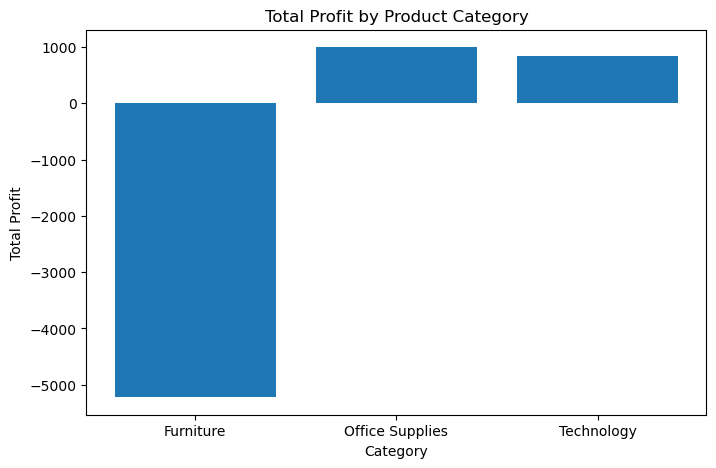

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.bar(category_summary["Category"], category_summary["Total_Profit"])

plt.title("Total Profit by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")

plt.show()

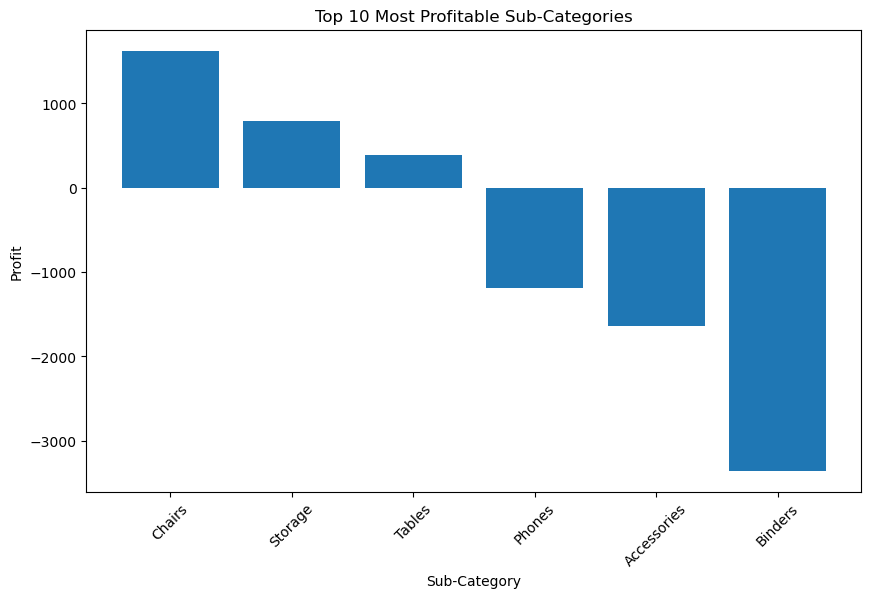

In [22]:
top10 = subcat_summary.head(10)

plt.figure(figsize=(10,6))

plt.bar(top10["Sub_Category"], top10["Total_Profit"])

plt.title("Top 10 Most Profitable Sub-Categories")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")

plt.xticks(rotation=45)
plt.show()

# This project compared sales and profit across product categories and sub-categories. It identified which product groups contribute the most to overall profitability, helping the business prioritize high-performing categories and improve low-profit segments.